<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/AVH_Car_Rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [274]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [275]:
# Read the Training Data
train_data = pd.read_csv("/content/drive/MyDrive/AV_Car_rental/train_E1GspfA.csv")

In [276]:
train_data.shape

(18247, 3)

In [277]:
train_data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [278]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [279]:
train_data.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [280]:
train_data.corr()

,hour,demand
hour,1.000000,0.161498
demand,0.161498,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


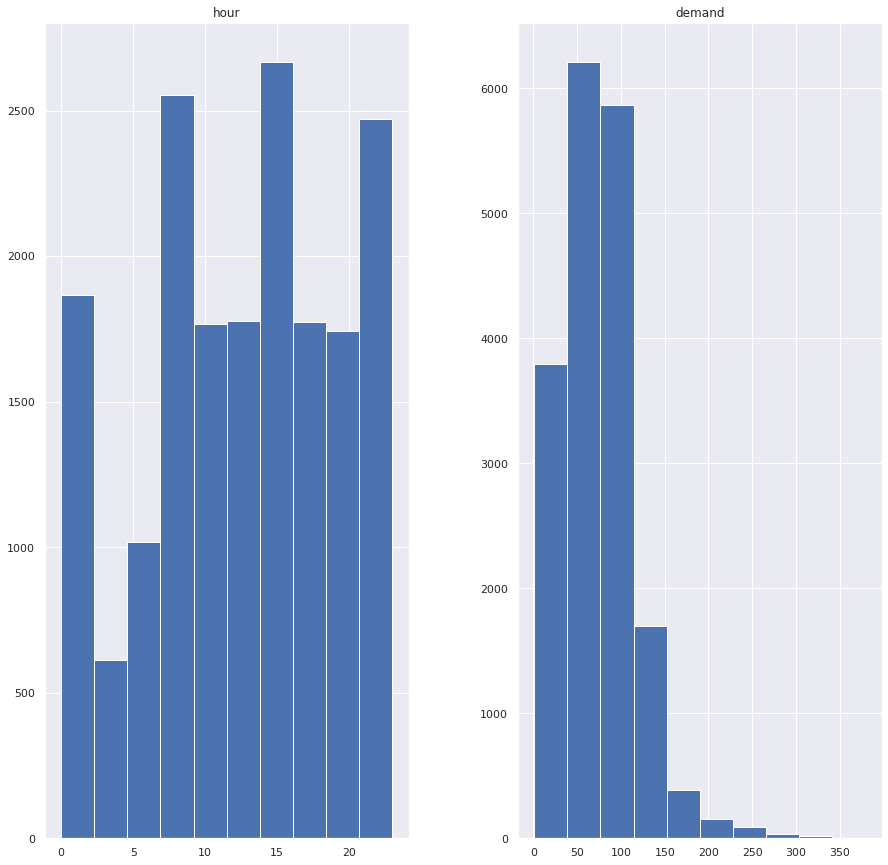

In [281]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = train_data.hist(ax=ax)

In [282]:
''' Since it is string value, we extract date alone from the existing column
by creating the new column '''

train_data["travel_day"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.day

In [283]:
''' Since it is string value, we extract month alone from the existing column
by creating the new column '''

train_data["travel_month"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.month

In [284]:
''' Since it is string value, we extract year alone from the existing column
by creating the new column '''

train_data["travel_year"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.year

In [285]:
# Since we have converted date column into integers, Now we can drop as it is of no use.

train_data.drop(["date"], axis = 1, inplace = True)

In [286]:
train_data.head()

,hour,demand,travel_day,travel_month,travel_year
0,9,91,18,8,2018
1,10,21,18,8,2018
2,13,23,18,8,2018
3,14,104,18,8,2018
4,15,81,18,8,2018


In [287]:
###Splitting X and Y
X = train_data.loc[:, ['hour','travel_day','travel_month','travel_year']]
Y = train_data['demand']

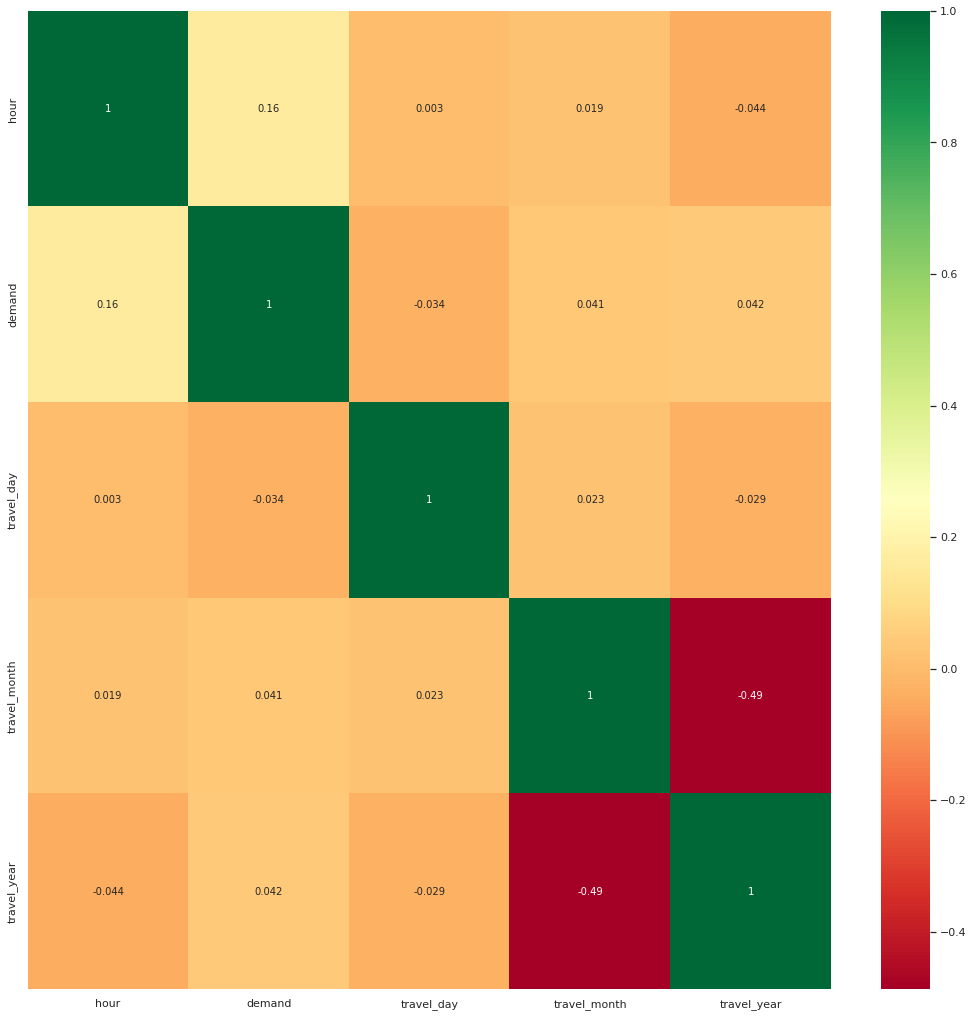

In [288]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [289]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [290]:
print(selection.feature_importances_)

[0.22227195 0.53238943 0.1901523  0.05518632]


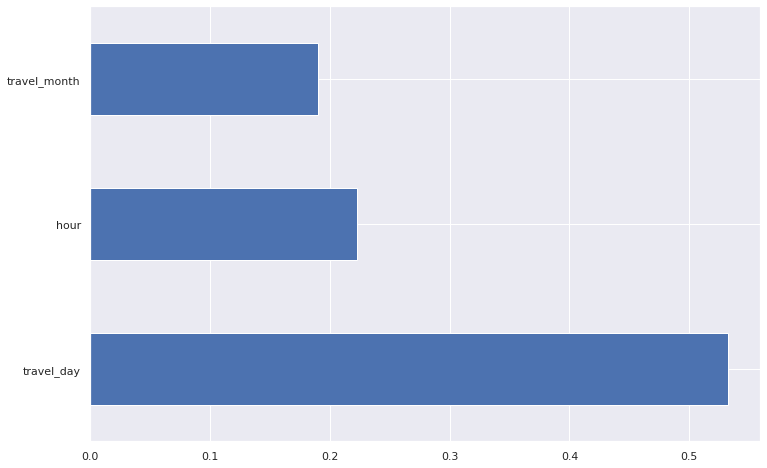

In [291]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [292]:
###Splitting X and Y. Ignoring Least Important Column
X = train_data.loc[:, ['hour','travel_day','travel_month']]
Y = train_data['demand']

In [293]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [294]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(13685, 3)
(4562, 3)
(13685,)
(4562,)


In [295]:
#Try with Linear Regression

from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
Linear_Reg.fit(x_train, y_train)

LinearRegression()

In [296]:
y_pred_lr = Linear_Reg.predict(x_test)

In [297]:
from sklearn import metrics

In [298]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 31.334730169640945
MSE: 1633.4086199473297
RMSE: 40.41545026283055


In [299]:
lr_test_rmse = []
random_state = range(1,100,10)

for i in random_state:
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    Linear_Reg.fit(x_train,y_train)
    Y_pred_LR = Linear_Reg.predict(x_test)
    lr_test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_LR)))
    
print(lr_test_rmse)

[40.315121670334364, 40.90286053700679, 40.768906633153556, 41.15554231336735, 41.09709237987521, 41.094614767651834, 41.49904116258738, 40.404903207866646, 41.432398630278286, 41.050678058237615]


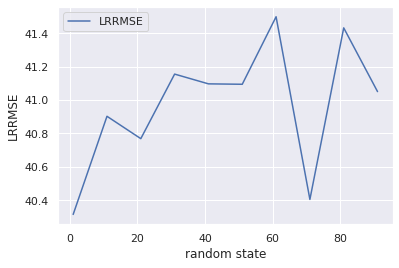

In [300]:
plt.plot(random_state,lr_test_rmse, label = "LRRMSE")
plt.ylabel("LRRMSE")
plt.xlabel("random state")
plt.legend()

In [301]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion = "mse", max_depth = 8)
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [302]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

MAE: 29.470262253053654
MSE: 1333.0874290464478
RMSE: 36.511469828623


In [303]:
dt_test_rmse =[]
for i in range(1, 11):
    dt_para = DecisionTreeRegressor(max_depth=i)
    dt_para.fit(x_train,y_train)
    y_pred_dt_para = dt_para.predict(x_test)
    dt_test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt_para)))
print(dt_test_rmse)

[40.128273331081196, 39.16583533419426, 38.28016443865665, 37.74136304554364, 37.099423698111465, 36.365098473986585, 36.305876402672745, 36.511469828623, 36.84411162780912, 37.75343247665359]


Text(0.5, 1.0, 'Decision Tree Regressor scores for different depth values')

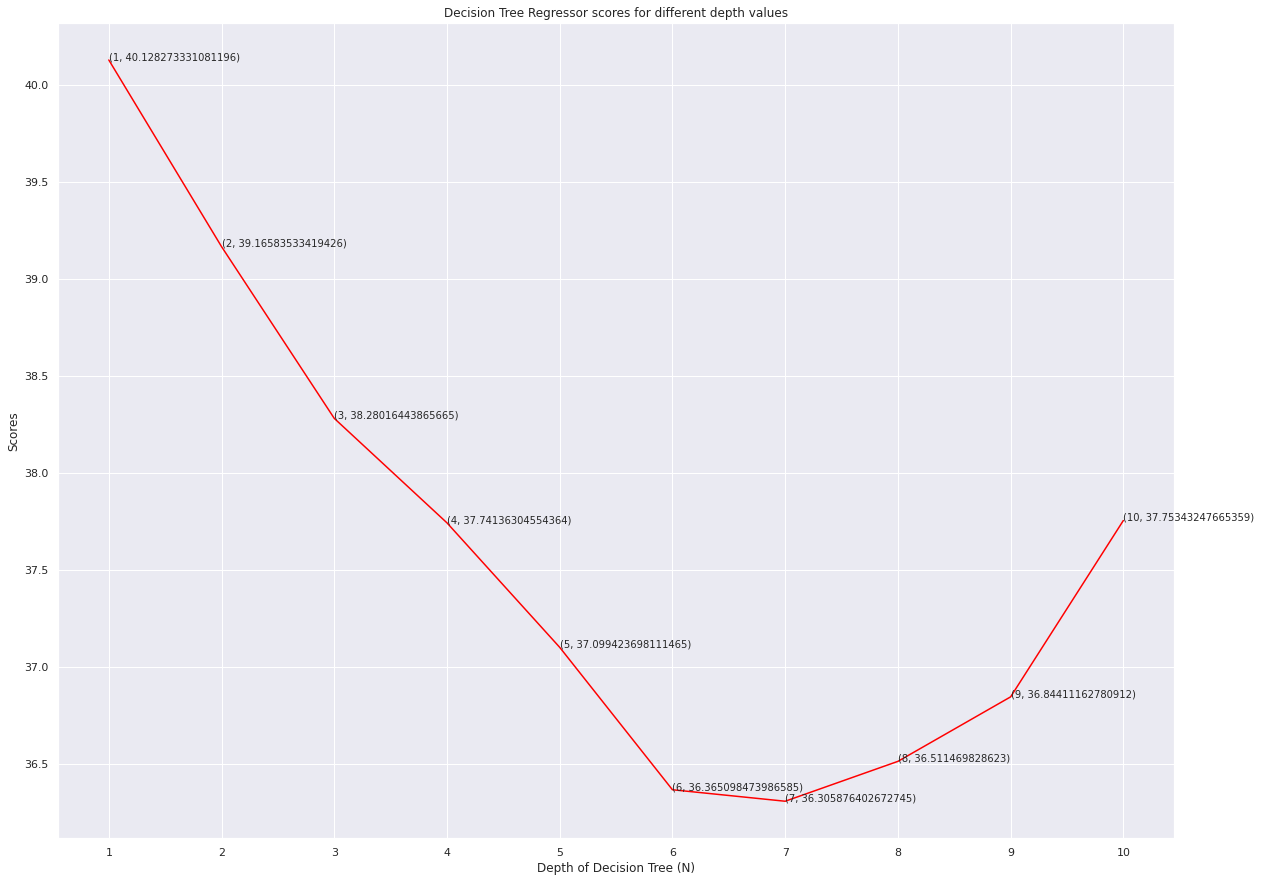

In [304]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], dt_test_rmse, color = 'red')
for i in range(1,11):
    plt.text(i, dt_test_rmse[i-1], (i, dt_test_rmse[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Regressor scores for different depth values')

Decision Tree regressor rmse with max_depth=8 is: 35.93533504


In [305]:
dt.tree_.node_count

497

In [306]:
dt.tree_.max_depth

8

Bagging

In [307]:
from sklearn.ensemble import BaggingRegressor

base_estimator = dt, max_samples = 0.5

In [308]:
bag = BaggingRegressor(base_estimator = dt, max_samples = 0.6)
bag.fit(x_train,y_train)
Y_pred_bag = bag.predict(x_test)

In [309]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred_bag))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred_bag))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))

MAE: 28.807426115156584
MSE: 1266.206847347908
RMSE: 35.58380034998943


In [310]:
bag_rmse = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingRegressor(base_estimator = dt, max_samples = i)
    bag.fit(x_train,y_train)
    Y_pred_bag = bag.predict(x_test)
    bag_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))
print(bag_rmse)

[36.05126662189162, 35.923546557136376, 35.54102820525268, 35.664881551601965, 35.802608523759865, 35.67948456090358, 35.67192010519252, 35.73503432461656, 35.620470906157045]


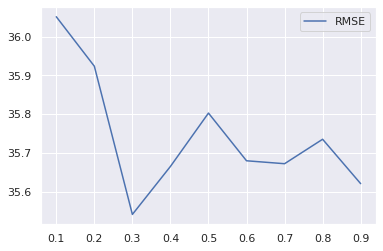

In [311]:
# Plotting the results of Random_Forest
plt.plot(ms,bag_rmse,label = "RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


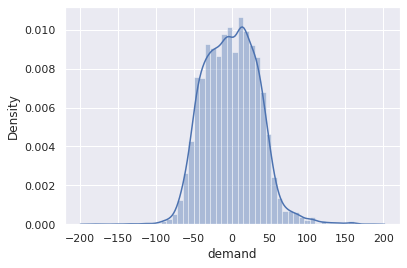

In [312]:
sns.distplot(y_test-Y_pred_bag)
plt.show()

In [313]:
from sklearn.model_selection import cross_val_score

In [314]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_features = 0.4, n_estimators = 31)
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_features=0.4, n_estimators=31)

In [315]:
y_pred_rf = reg_rf.predict(x_test)

In [316]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 32.77097425744089
MSE: 1718.1811293380317
RMSE: 41.45094847332244


In [317]:
reg_rf.score(x_train, y_train)

0.6352861764396187

In [318]:
rf_score = []
mf = np.arange(0.1,1,0.1)
for i in mf:
    RF = RandomForestRegressor(max_features = i, n_estimators = 30)
    RF.fit(x_train,y_train)
    Y_pred_rf = RF.predict(x_test)
    rf_score.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_rf)))    
print(rf_score)

[41.57643674177499, 41.3633449174862, 41.54704374006008, 41.37129710944147, 41.4677739032737, 41.59042251322442, 41.51292127500756, 41.590595212307875, 41.62957963604144]


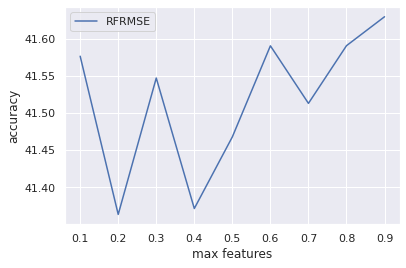

In [319]:
plt.plot(mf,rf_score,label = "RFRMSE")
plt.ylabel("accuracy")
plt.xlabel("max features")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


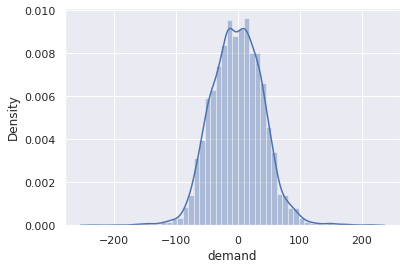

In [320]:
sns.distplot(y_test-y_pred_rf)
plt.show()

**Ada Boost**

In [321]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(base_estimator = dt, n_estimators = 20)
adb.fit(x_train,y_train)
Y_pred_adb = adb.predict(x_test)

In [322]:
print('ADB_MAE:', metrics.mean_absolute_error(y_test, Y_pred_adb))
print('ADB_MSE:', metrics.mean_squared_error(y_test, Y_pred_adb))
print('ADB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_adb)))

ADB_MAE: 29.375668158470067
ADB_MSE: 1321.3339350222113
ADB_RMSE: 36.35015729019905


In [323]:
adb_rmsescore = []
est = range(1,100,10)
for i in est:
    adb = AdaBoostRegressor(base_estimator = dt, n_estimators = i)
    adb.fit(x_train,y_train)
    y_pred_adb = adb.predict(x_test)
    adb_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_adb)))    

print(adb_rmsescore)

[37.02028596453217, 36.280879939461485, 36.20403520602028, 36.4194449119964, 36.41405378302445, 36.40023782900473, 36.321992599221154, 36.259684900295355, 36.197303923523826, 36.48240289785263]


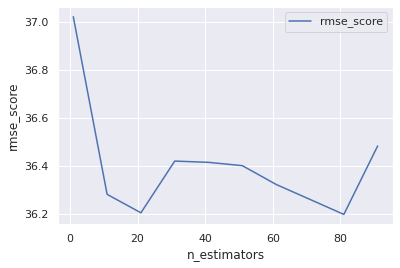

In [324]:
plt.plot(est,adb_rmsescore,label = "rmse_score")
plt.ylabel("rmse_score")
plt.xlabel("n_estimators")
plt.legend()

**GradientBoosting**

In [325]:
from sklearn.ensemble import GradientBoostingRegressor

In [326]:
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.125)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)

In [327]:
print('GRB_MAE:', metrics.mean_absolute_error(y_test, y_pred_gbr))
print('GRB_MSE:', metrics.mean_squared_error(y_test, y_pred_gbr))
print('GRB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

GRB_MAE: 28.93691491441076
GRB_MSE: 1296.1688582033255
GRB_RMSE: 36.002345176437125


In [328]:
grb_rmsescore = []
setting = np.arange(0.01,0.2,0.01)
for i in setting:
    grb = GradientBoostingRegressor(n_estimators = 100, learning_rate = i)
    grb.fit(x_train,y_train)
    y_pred_grb = grb.predict(x_test)
    grb_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_grb)))    

print(grb_rmsescore)

[38.580160549840734, 37.670767635526786, 37.08225860465105, 36.794331319631226, 36.55595785718237, 36.38431239616684, 36.2947200193258, 36.24323710208227, 36.1346957324857, 36.10803512443055, 36.04561764111216, 36.026160409131606, 35.97549018392128, 35.90719653042819, 35.87122097237788, 35.88551252121976, 35.85207999595996, 35.84448696757034, 35.82260540567711]


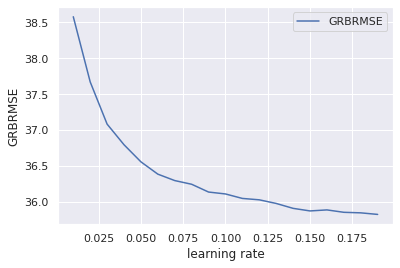

In [329]:
plt.plot(setting,grb_rmsescore,label = "GRBRMSE")
plt.ylabel("GRBRMSE")
plt.xlabel("learning rate")
plt.legend()

**XG Boost**

In [330]:
from xgboost import XGBRegressor
XG = XGBRegressor(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = 35)
XG.fit(x_train,y_train)
y_pred_XG = XG.predict(x_test)

[11:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [331]:
print('XG_MAE:', metrics.mean_absolute_error(y_test, y_pred_XG))
print('XG_MSE:', metrics.mean_squared_error(y_test, y_pred_XG))
print('XG_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)))

XG_MAE: 29.174369770206816
XG_MSE: 1339.787377534176
XG_RMSE: 36.60310611866397


In [332]:
XG_rmsescore = []
est = range(1,100,10)
for i in est:
    XG = XGBRegressor(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = i)
    XG.fit(x_train,y_train)
    Y_pred_XG = XG.predict(x_test)
    XG_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_XG)))    

print(XG_rmsescore)

[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

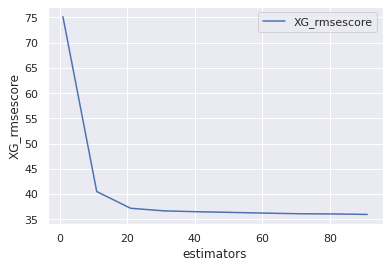

In [333]:
plt.plot(est,XG_rmsescore,label = "XG_rmsescore")
plt.ylabel("XG_rmsescore")
plt.xlabel("estimators")
plt.legend()

In [334]:
print('XG_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)))
print('GRB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print('ADB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_adb)))
print('RF_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('BAG_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))

XG_RMSE: 36.60310611866397
GRB_RMSE: 36.002345176437125
ADB_RMSE: 36.35015729019905
RF_RMSE: 41.45094847332244
BAG_RMSE: 35.620470906157045
